# Import  necessary libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import missingno as msno

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from tensorflow.python.framework import function
from tensorflow.python.framework import dtypes

import shap

# Data loading


In [2]:
All = pd.ExcelFile('allData.xls')
data = pd.read_excel(All, 'Data')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 34 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Number                                                              0 non-null      float64
 1   Data source                                                         1988 non-null   object 
 2   Selected                                                            194 non-null    object 
 3   Mix number in literature                                            1988 non-null   object 
 4   ASTM type 1 ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 5   CEM I 42.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 6   CEM I 52.5N ordinary Portland Cement content (kg/m^3)               1988 non-null   float64
 7   Class C Fly ash

In [4]:
data.shape

(1988, 34)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTM type 1 ordinary Portland Cement content (kg/m^3),1988.0,39.317656,106.825528,0.00,0.000000,0.000000,0.000000,702.0000
CEM I 42.5N ordinary Portland Cement content (kg/m^3),1988.0,95.567020,146.591457,0.00,0.000000,0.000000,210.000000,547.0000
CEM I 52.5N ordinary Portland Cement content (kg/m^3),1988.0,147.092807,152.375401,0.00,0.000000,155.000000,280.000000,660.0000
Class C Fly ash content (kg/m^3),1988.0,6.120221,28.791545,0.00,0.000000,0.000000,0.000000,225.0000
Class F Fly ash content (kg/m^3),1988.0,35.497918,65.744896,0.00,0.000000,0.000000,56.500000,544.0000
Slag content (kg/m^3),1988.0,34.629970,73.837709,0.00,0.000000,0.000000,0.000000,440.0000
Silica fume content (kg/m^3),1988.0,7.592819,21.082168,0.00,0.000000,0.000000,0.000000,150.0000
Water content (kg/m^3),1988.0,172.241112,28.371606,105.00,153.000000,170.000000,186.000000,295.0000
Superplasticizer content (kg/m^3),1988.0,2.335606,4.726357,0.00,0.000000,0.000000,2.702500,35.1000


In [6]:
data.duplicated().sum()

0

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


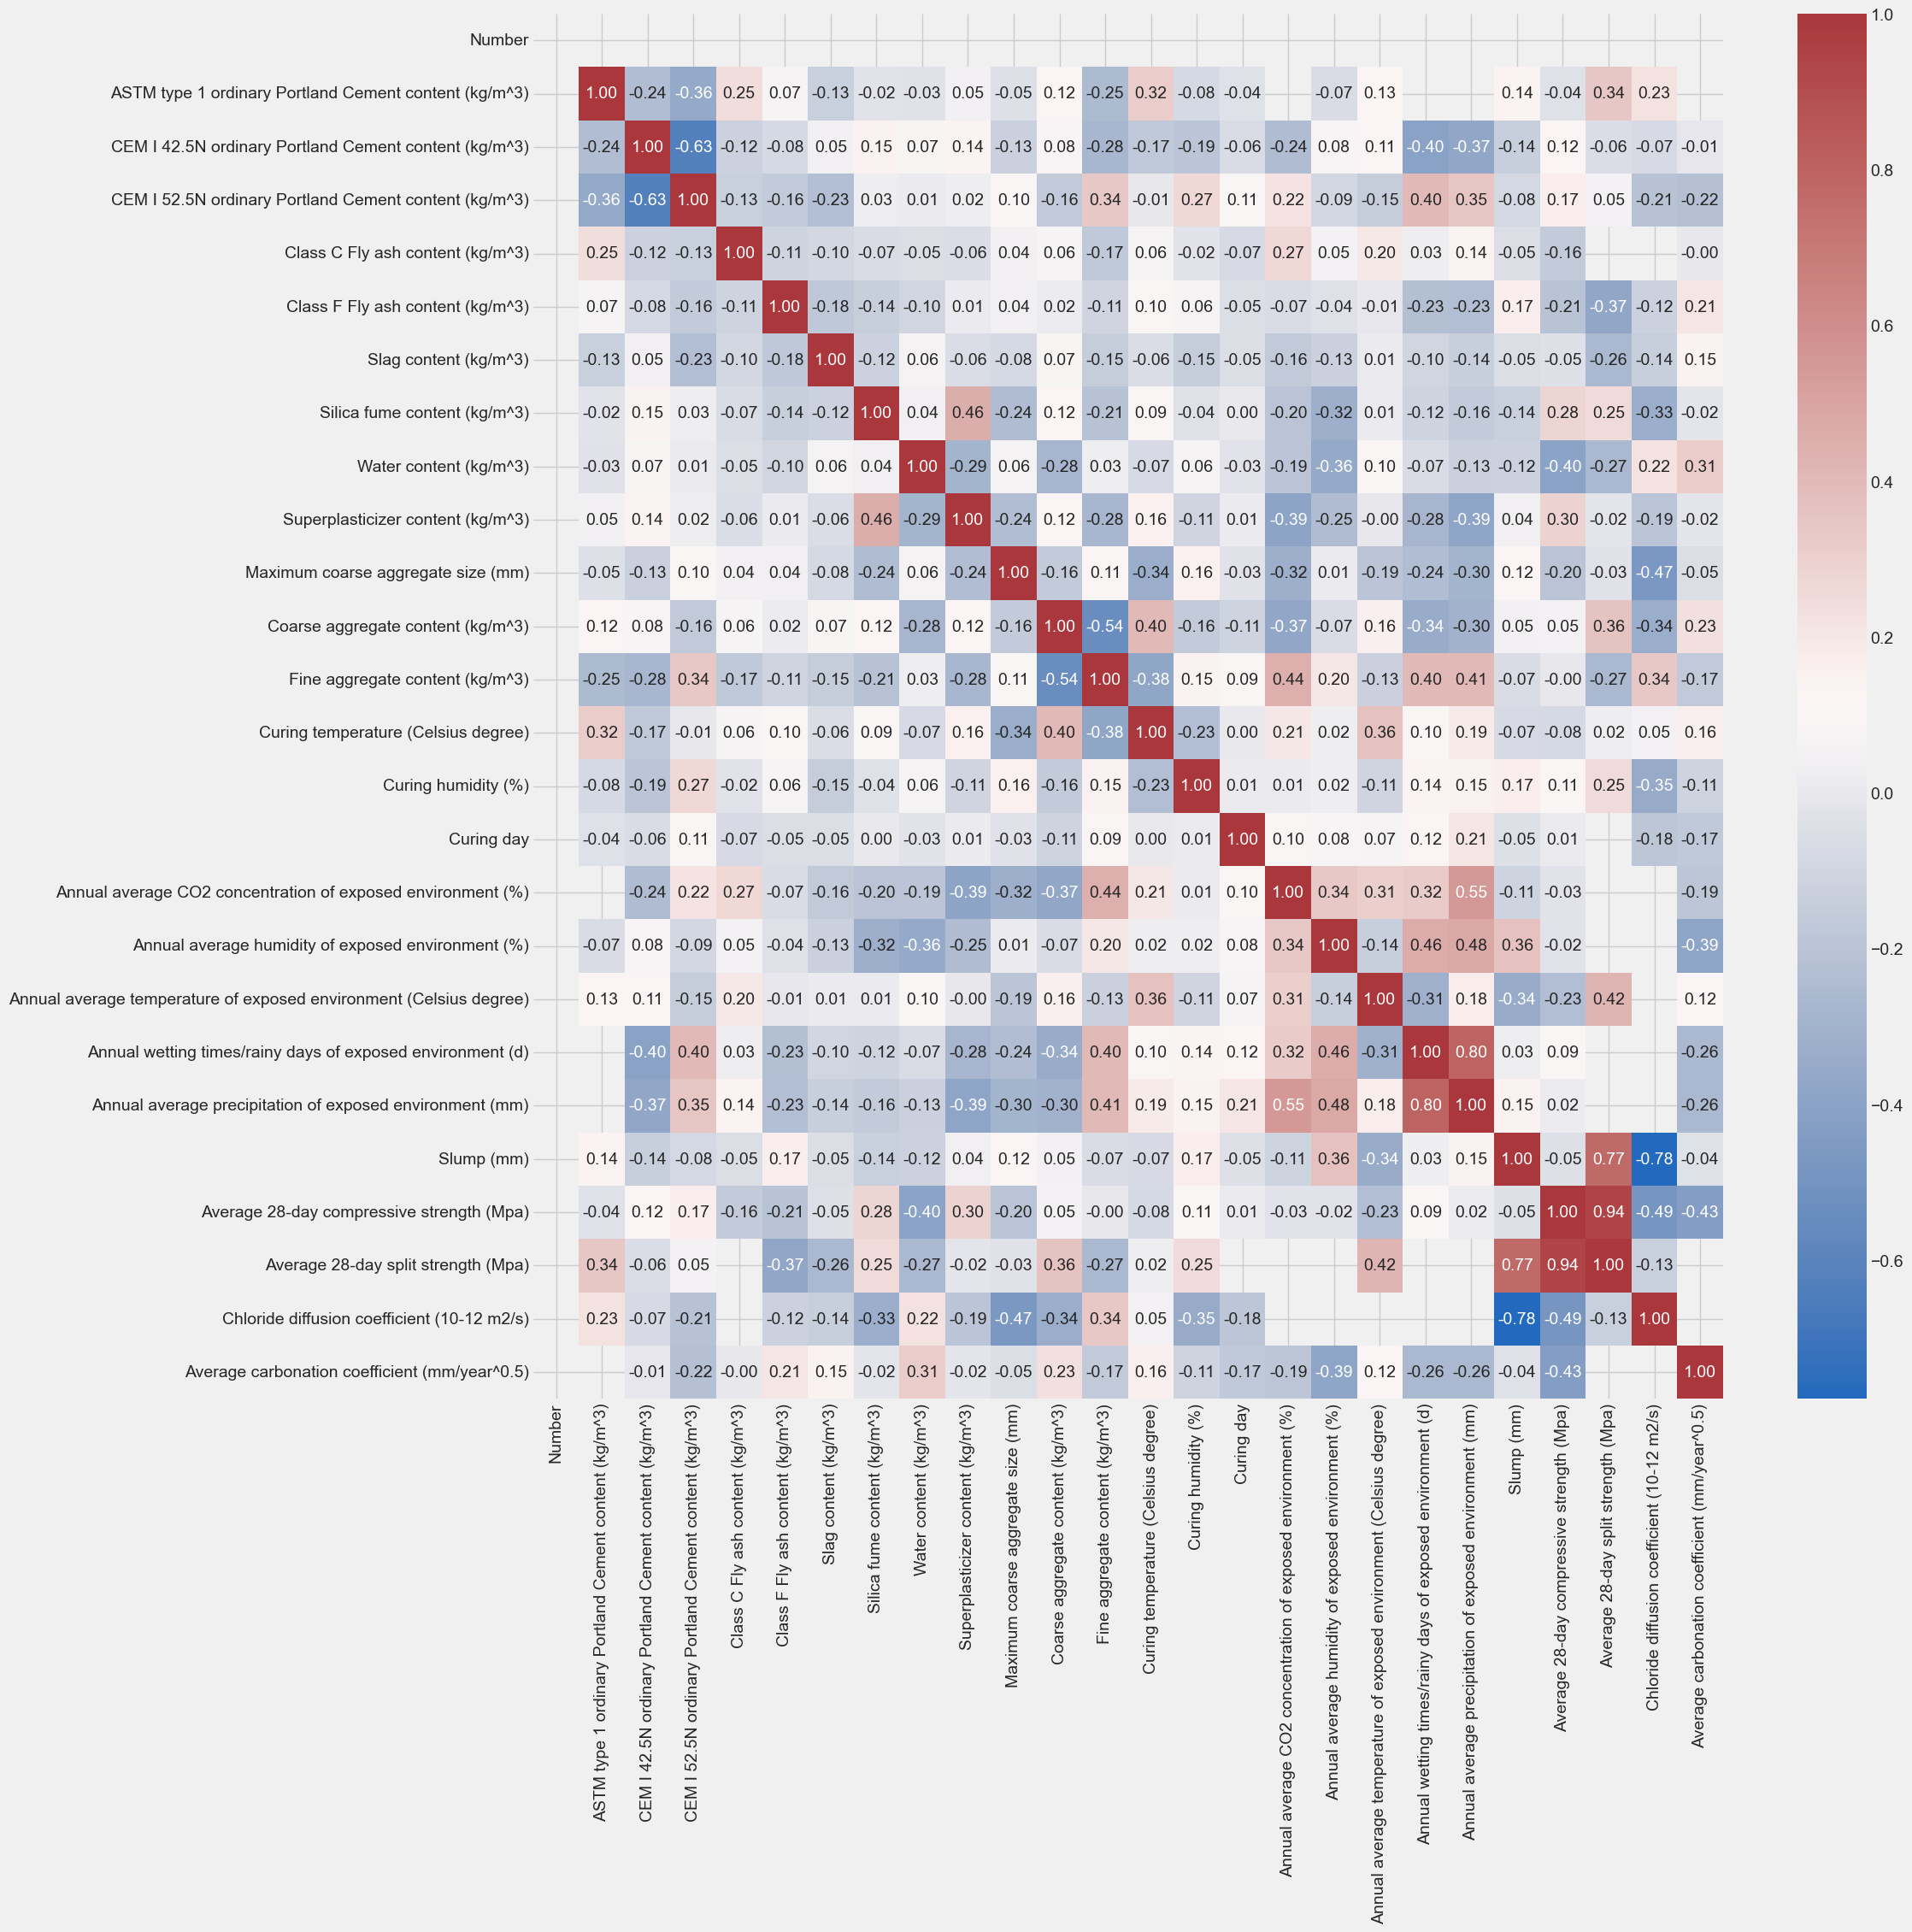

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, fmt='.2f', cmap = 'vlag')
plt.show()

<Axes: >

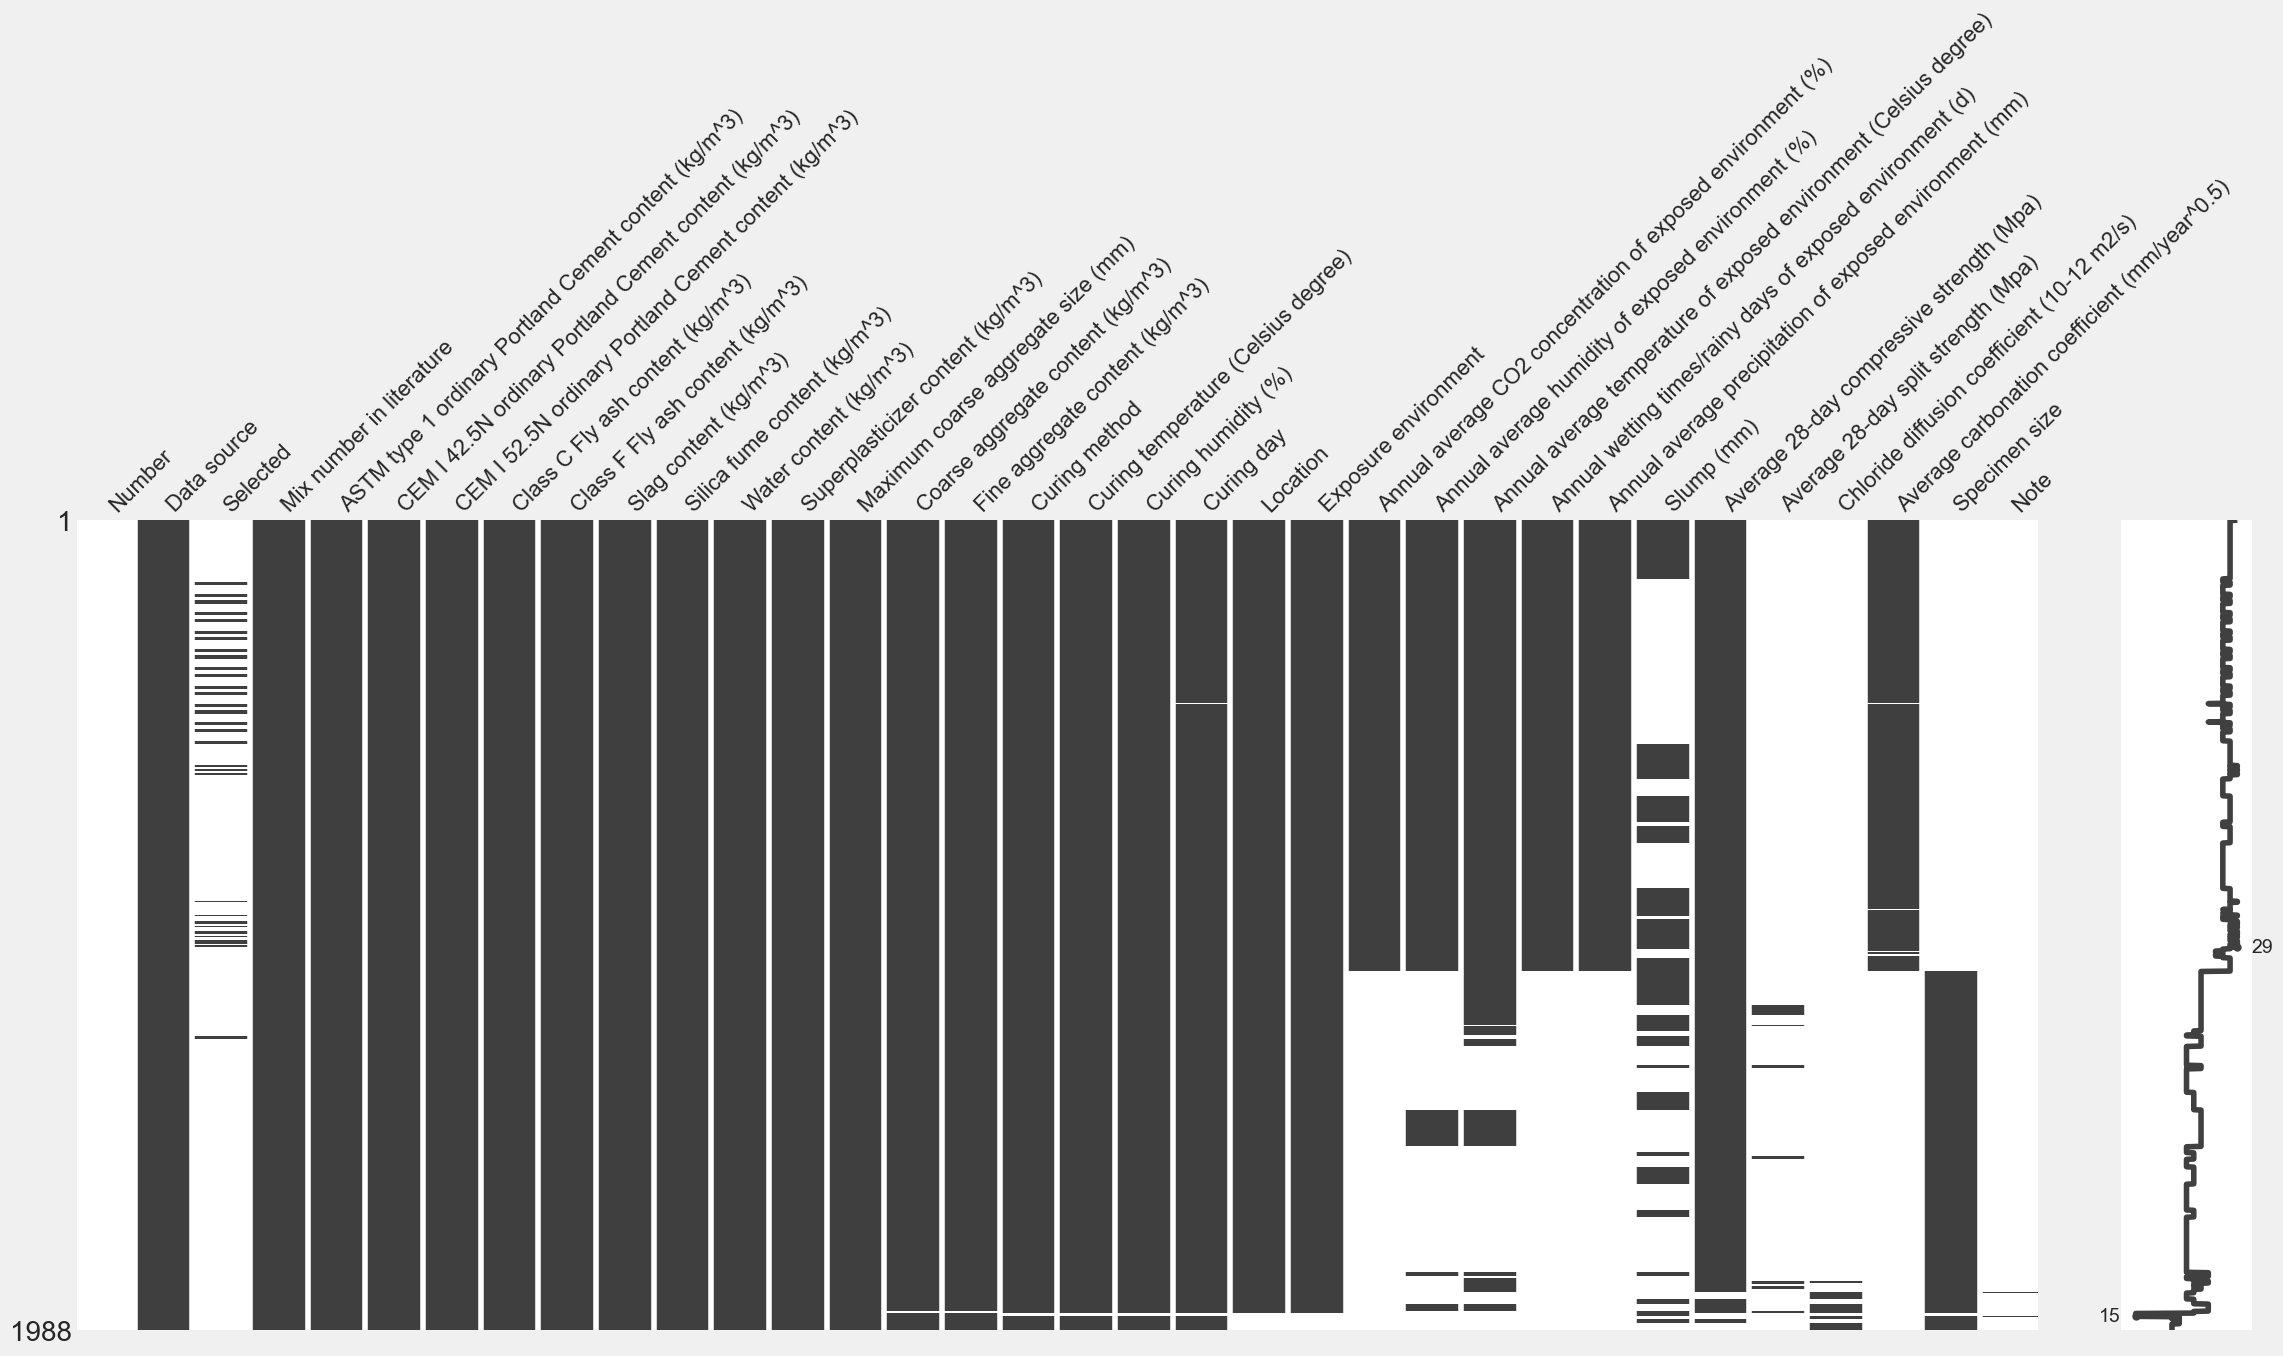

In [8]:
msno.matrix(data)

<Axes: >

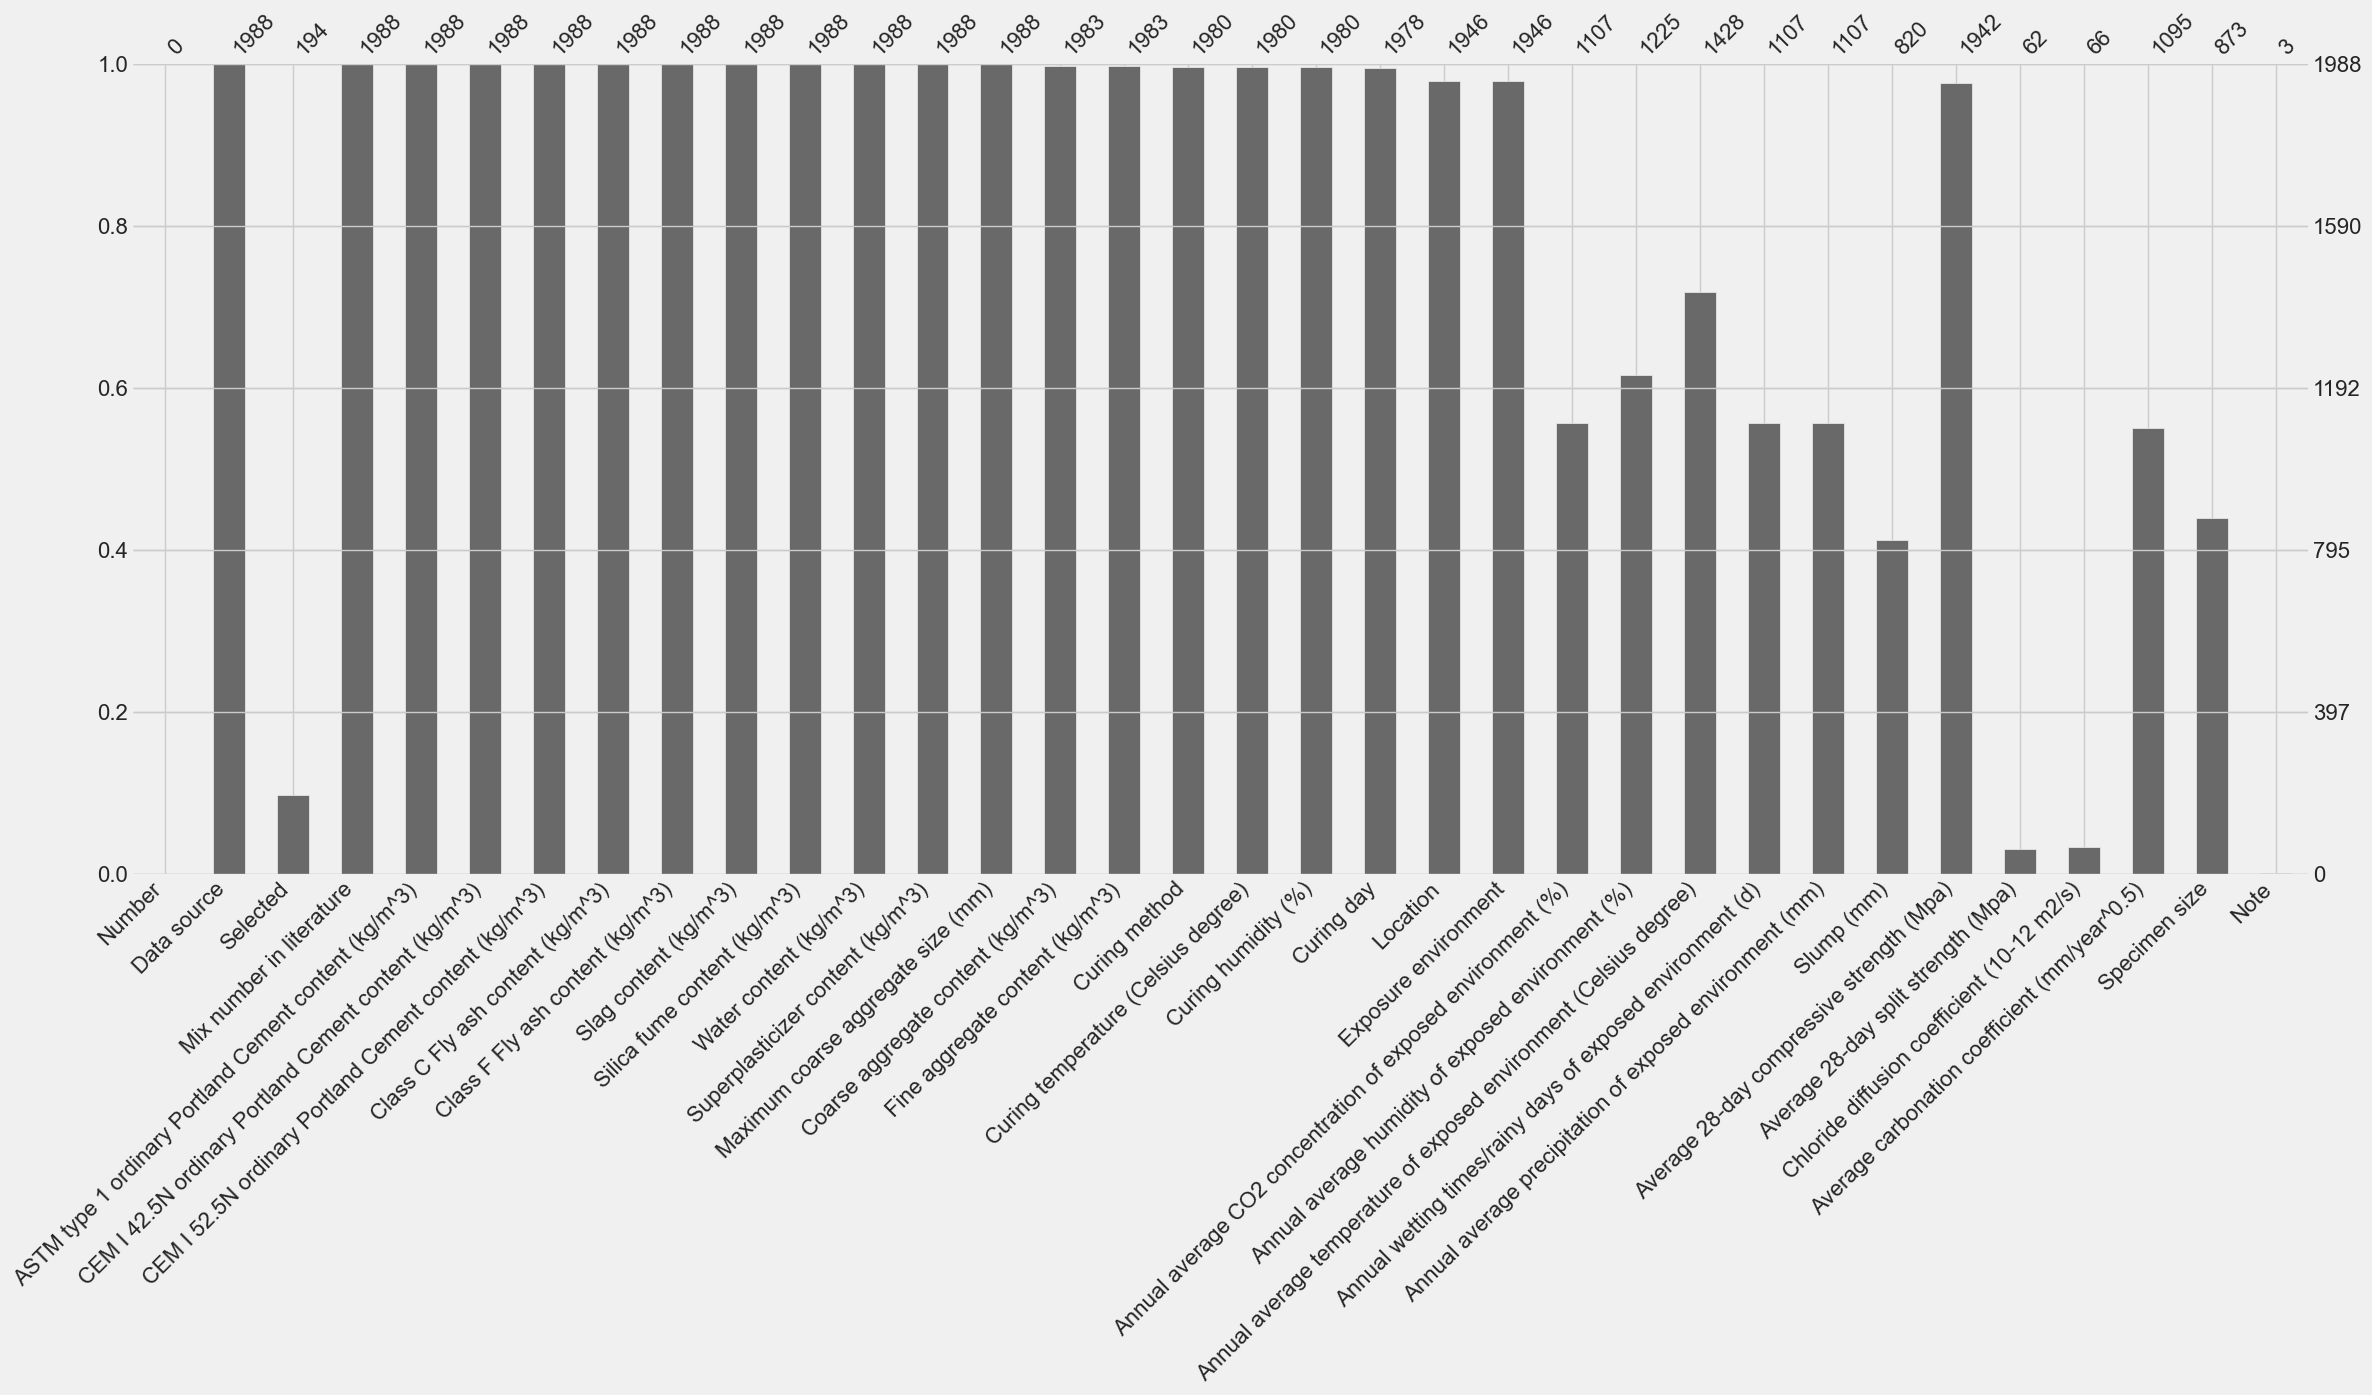

In [9]:
msno.bar(data)

<Axes: >

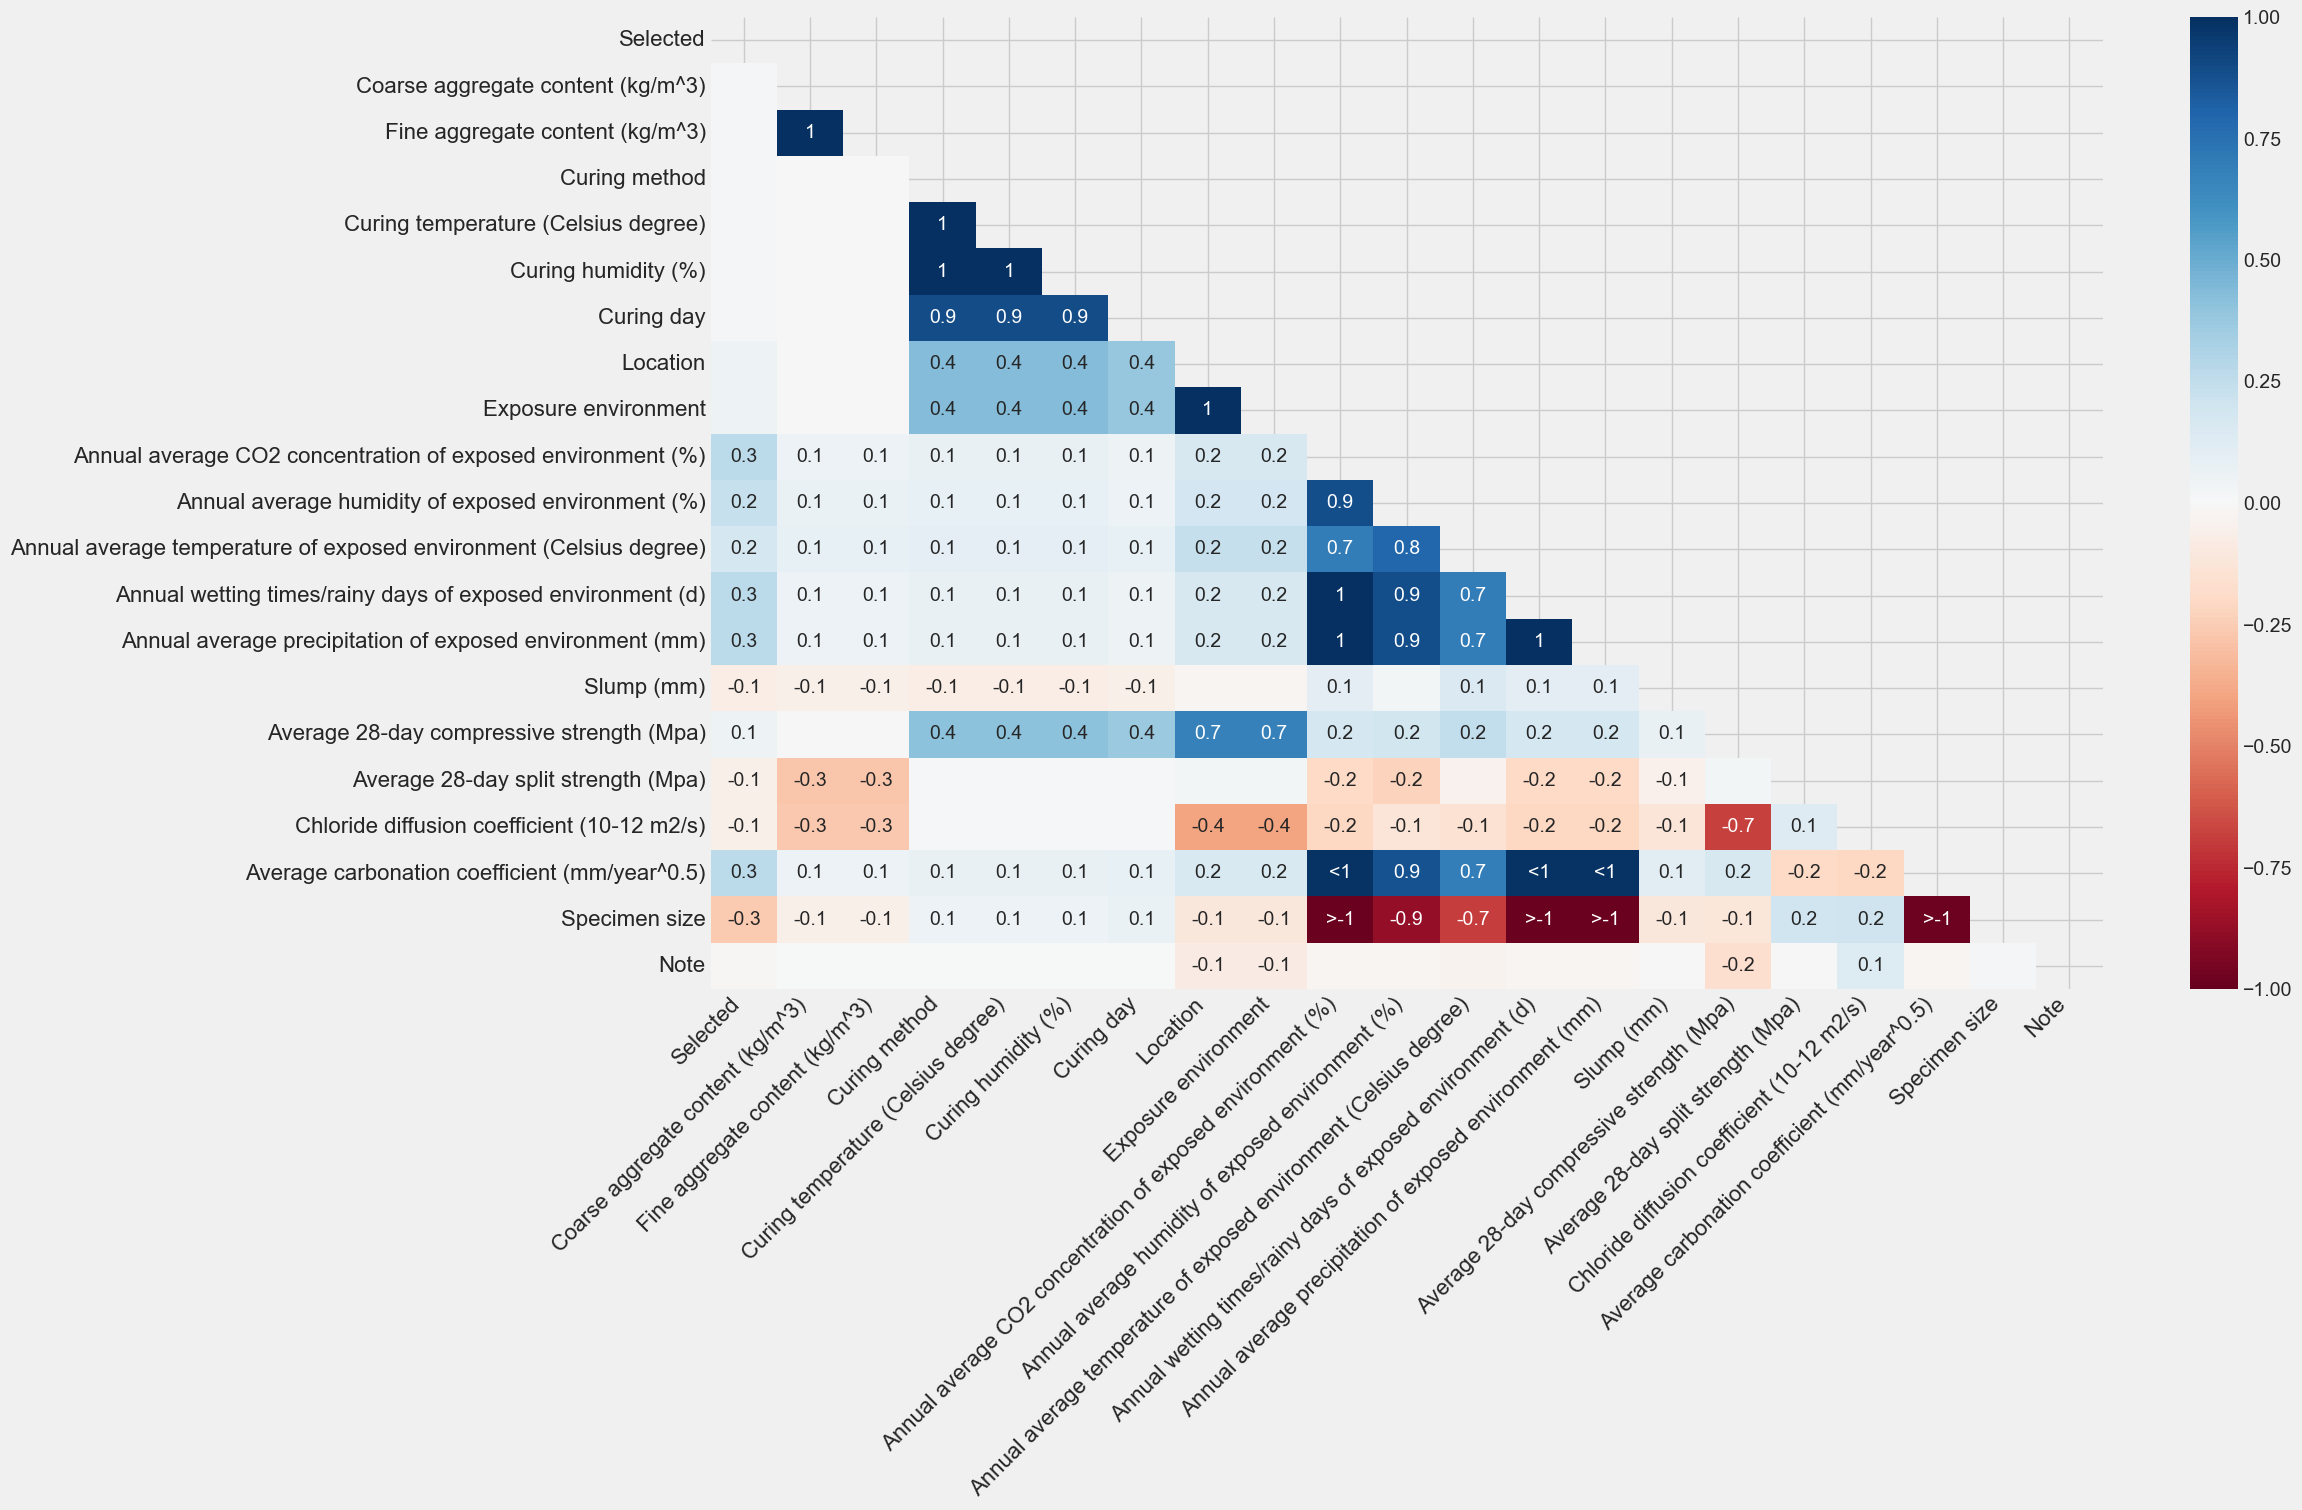

In [10]:
msno.heatmap(data)

In [11]:
Excess_col_indices = list(range(0, 4)) + list(range(19, 27)) + [33]
semi_df = data.iloc[:, [col for col in range(data.shape[1]) if col not in Excess_col_indices]]
semi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

# Quick fix on the compressive strength and conversion

In [12]:
# function to plot a boxplot and a histogram along the same scale.

def hist_boxplot(data, feature, figsize = (12,7),kde = True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw ={'height_ratios': (0.25,0.75)},
        figsize = figsize)
    sns.boxplot(data=data, x =feature, ax = ax_box2, showmeans = True, color = 'violet')

    if bins:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, bins=bins, palette = 'winter')

    else:
        sns.histplot(data=data, x =feature, kde = kde, ax = ax_hist2, palette = 'winter')
    ax_hist2.axvline(data[feature].mean(), color = 'green', linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = "-")

Ignoring `palette` because no `hue` variable has been assigned.


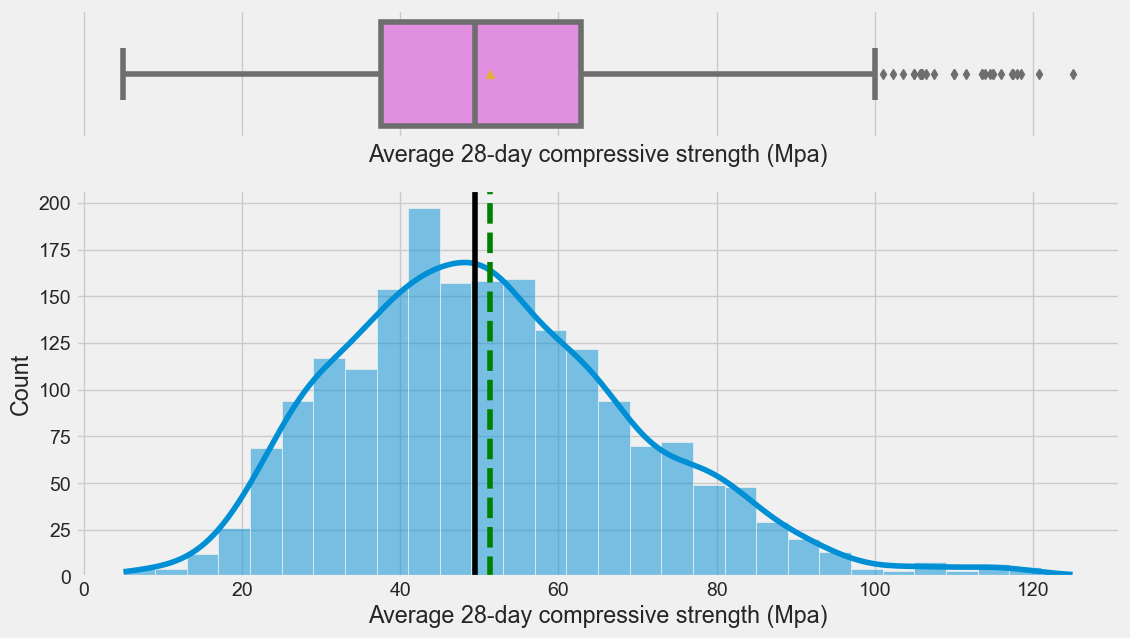

In [13]:
# Quick fix 

filtered_row = semi_df[semi_df['Average 28-day compressive strength (Mpa)'] > 400]

if len(filtered_row) == 1:
    value_to_divide = filtered_row['Average 28-day compressive strength (Mpa)'].values[0]
    updated_value = value_to_divide / 10

    # Update the value in the DataFrame
    semi_df.loc[semi_df['Average 28-day compressive strength (Mpa)'] > 400, 'Average 28-day compressive strength (Mpa)'] = updated_value
else:
    print("No rows or multiple rows matching the condition.")

hist_boxplot(semi_df, 'Average 28-day compressive strength (Mpa)')

In [14]:
## Conversion with specimen size
# Follow the same conversion factor from Compressive strength.ipynb
conversion_factors = {
    '150*150*150': 1.0,
    '200h*100r': {
        (15, 44): 1.21,
        (45, 54): 1.17,
        (55, 64): 1.12,
        (65, 74): 1.10,
        (75, 84): 1.08,
        (85, 94): 1.06,
        (95, 104): 1.04,  # Guess, out of range
        (105, 114): 1.02,
    },
    '100*100*100': 0.95,
    '100*100*300': {},  # No suitable conversion index available
    '300h*150r': {
        (15, 44): 1.32,
        (45, 54): 1.32,
        (55, 64): 1.28,
        (65, 74): 1.25,
        (75, 84): 1.22,
        (85, 94): 1.19,
        (95, 104): 1.16,
        (105, 114): 1.13,
    },
    '100h*100r': {},  # No suitable conversion index available
}


def convert_strength(row):
    size = row['Specimen size']
    strength = row['Average 28-day compressive strength (Mpa)']

    original_size = size  # Store the original size

    if size in conversion_factors:
        factor = conversion_factors[size]

        if isinstance(factor, dict):
            for range_, conversion_factor in factor.items():
                lower_bound, upper_bound = range_
                if lower_bound <= strength < upper_bound:
                    return strength * conversion_factor
        else:
            return strength * factor

    return strength


# Apply the conversion function to the DataFrame
semi_df['Converted Strength'] = semi_df.apply(convert_strength, axis=1)

# Print the updated DataFrame
print(semi_df)

      ASTM type 1 ordinary Portland Cement content (kg/m^3)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
1983                                              350.0       
1984                                              380.0       
1985                                              370.0       
1986                                              360.0       
1987                                              350.0       

      CEM I 42.5N ordinary Portland Cement content (kg/m^3)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
semi_df['Converted Strength']

0       75.93
1       64.50
2       49.23
3       36.00
4       62.80
        ...  
1983      NaN
1984      NaN
1985      NaN
1986      NaN
1987      NaN
Name: Converted Strength, Length: 1988, dtype: float64

In [16]:
semi_df = semi_df.drop(['Average 28-day compressive strength (Mpa)', 'Specimen size'], axis = 1)
semi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1988 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1988 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1988 non-null   float64
 5   Slag content (kg/m^3)                                  1988 non-null   float64
 6   Silica fume content (kg/m^3)                           1988 non-null   float64
 7   Water content (kg/m^3)                                 1988 non-null   float64
 8   Superplasticizer content (kg/m^3)               

# Curing method

In [17]:
missing = semi_df['Curing method'].isnull()
semi_df[missing]

,ASTM type 1 ordinary Portland Cement content (kg/m^3),CEM I 42.5N ordinary Portland Cement content (kg/m^3),CEM I 52.5N ordinary Portland Cement content (kg/m^3),Class C Fly ash content (kg/m^3),Class F Fly ash content (kg/m^3),Slag content (kg/m^3),Silica fume content (kg/m^3),Water content (kg/m^3),Superplasticizer content (kg/m^3),Maximum coarse aggregate size (mm),Coarse aggregate content (kg/m^3),Fine aggregate content (kg/m^3),Curing method,Curing temperature (Celsius degree),Curing humidity (%),Slump (mm),Average 28-day split strength (Mpa),Chloride diffusion coefficient (10-12 m2/s),Average carbonation coefficient (mm/year^0.5),Converted Strength
1946,0.0,450.0,0.0,0.0,0.0,0.0,0.0,171.0,5.130,9.5,1110.0,680.0,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN
1947,0.0,405.0,0.0,0.0,0.0,0.0,45.0,171.0,5.850,9.5,1101.0,675.0,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN
1948,0.0,337.5,0.0,0.0,0.0,112.5,0.0,171.0,5.850,9.5,1105.0,677.0,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN
1949,0.0,292.5,0.0,0.0,0.0,112.5,45.0,171.0,5.895,9.5,1096.0,672.0,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN
1950,0.0,225.0,0.0,0.0,0.0,225.0,0.0,171.0,5.400,9.5,1100.0,674.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN
1951,0.0,180.0,0.0,0.0,0.0,225.0,45.0,171.0,5.850,9.5,1091.0,669.0,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN
1952,0.0,135.0,0.0,0.0,0.0,315.0,0.0,171.0,4.230,9.5,1111.0,681.0,NaN,NaN,NaN,155.0,NaN,NaN,NaN,NaN
1953,0.0,90.0,0.0,0.0,0.0,315.0,45.0,171.0,5.850,9.5,1102.0,675.0,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN


In [18]:
semi_df = semi_df.dropna(subset = ['Curing method'])
new_df = semi_df.copy()
new_df = pd.concat([semi_df, pd.get_dummies(semi_df['Curing method'])], axis=1)
new_df.isnull().sum()

ASTM type 1 ordinary Portland Cement content (kg/m^3)       0
CEM I 42.5N ordinary Portland Cement content (kg/m^3)       0
CEM I 52.5N ordinary Portland Cement content (kg/m^3)       0
Class C Fly ash content (kg/m^3)                            0
Class F Fly ash content (kg/m^3)                            0
Slag content (kg/m^3)                                       0
Silica fume content (kg/m^3)                                0
Water content (kg/m^3)                                      0
Superplasticizer content (kg/m^3)                           0
Maximum coarse aggregate size (mm)                          0
Coarse aggregate content (kg/m^3)                           5
Fine aggregate content (kg/m^3)                             5
Curing method                                               0
Curing temperature (Celsius degree)                         0
Curing humidity (%)                                         0
Slump (mm)                                               1168
Average 

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1987
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1980 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1980 non-null   float64
 5   Slag content (kg/m^3)                                  1980 non-null   float64
 6   Silica fume content (kg/m^3)                           1980 non-null   float64
 7   Water content (kg/m^3)                                 1980 non-null   float64
 8   Superplasticizer content (kg/m^3)               

In [20]:
new_df = new_df.drop(['Curing method', 'Curing humidity (%)'], axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1987
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ASTM type 1 ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 1   CEM I 42.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 2   CEM I 52.5N ordinary Portland Cement content (kg/m^3)  1980 non-null   float64
 3   Class C Fly ash content (kg/m^3)                       1980 non-null   float64
 4   Class F Fly ash content (kg/m^3)                       1980 non-null   float64
 5   Slag content (kg/m^3)                                  1980 non-null   float64
 6   Silica fume content (kg/m^3)                           1980 non-null   float64
 7   Water content (kg/m^3)                                 1980 non-null   float64
 8   Superplasticizer content (kg/m^3)               

# Data preparation

In [21]:
target = new_df.iloc[:, 13:18]
features = new_df.drop(target.columns, axis=1)

In [22]:
slump = pd.concat([pd.DataFrame(features), target.iloc[:, 0]], axis=1).dropna(axis=0, how='any').values
split_str = pd.concat([pd.DataFrame(features), target.iloc[:, 1]], axis=1).dropna(axis=0, how='any').values
chloride = pd.concat([pd.DataFrame(features), target.iloc[:, 2]], axis=1).dropna(axis=0, how='any').values
carbon = pd.concat([pd.DataFrame(features), target.iloc[:, 3]], axis=1).dropna(axis=0, how='any').values
comp_str = pd.concat([pd.DataFrame(features), target.iloc[:, 4]], axis=1).dropna(axis=0, how='any').values

In [23]:
X = [
    slump[:,:-1],
    split_str[:,:-1],
    chloride[:,:-1],
    carbon[:,:-1],
    comp_str[:,:-1]
]

Y = [
    slump[:,-1:],
    split_str[:,-1:],
    chloride[:,-1:],
    carbon[:,-1:],
    comp_str[:,-1:]
]

In [24]:
X[1]

array([[5.000e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.500e+02, 0.000e+00, 1.000e+01, 1.086e+03, 7.240e+02,
        2.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [4.250e+02, 0.000e+00, 0.000e+00, 0.000e+00, 7.500e+01, 0.000e+00,
        0.000e+00, 1.500e+02, 0.000e+00, 1.000e+01, 1.086e+03, 7.000e+02,
        2.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [3.750e+02, 0.000e+00, 0.000e+00, 0.000e+00, 1.250e+02, 0.000e+00,
        0.000e+00, 1.500e+02, 0.000e+00, 1.000e+01, 1.086e+03, 6.830e+02,
        2.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [2.750e+02, 0.000e+00, 0.000e+00, 0.000e+00, 2.250e+02, 0.000e+00,
        0.000e+00, 1.500e+02, 0.000e+00, 1.000e+01, 1.086e+03, 6.500e+02,
        2.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [2.250e+02, 0.000e+00, 0.000e+00, 0.000e+00, 2.750e+02, 0.000e+00,
        0.000e+00, 1.500e+02, 0.000e+00, 1.000e+01, 1.086e+03, 6.340e+02,
    

In [25]:
for i in range(5):
    print(X[i].shape)

(807, 17)
(57, 17)
(61, 17)
(1095, 17)
(1937, 17)


## Dimensions of the data

In [26]:
T = len(Y) # Number of tasks
O = [y.shape[1] for y in Y] # Number of output per task
D = [x.shape[1] for x in X] # Dimension of the feature vector

In [27]:
T

5

In [28]:
O

[1, 1, 1, 1, 1]

In [29]:
D

[17, 17, 17, 17, 17]

## Train test split

In [30]:
X_train = []
Y_train = []
X_test = []
Y_test = []

scaler = StandardScaler()

from sklearn.model_selection import train_test_split
for sub_task in range(T):
    x_train, x_test, y_train, y_test = train_test_split(X[sub_task], Y[sub_task], test_size=0.2, random_state=42)
    x_train = scaler.fit_transform(x_train)
    X_train.append(x_train)
    Y_train.append(y_train)
    x_test = scaler.transform(x_test)
    X_test.append(x_test)
    Y_test.append(y_test)

In [31]:
X_train[0].shape

(645, 17)

In [32]:
Y_train[0].shape

(645, 1)

# Multi-task model

In [36]:
def nuclear_norm_grad(x, dy):
    _, U, V = tf.linalg.svd(x, full_matrices=False)
    grad = tf.matmul(U, tf.transpose(V))
    return dy * grad

def nuclear_norm(x):
    sigma = tf.linalg.svd(x, full_matrices=False, compute_uv=False)
    norm = tf.reduce_sum(sigma)
    return norm

def TensorUnfold(A, k):
    tmp_arr = np.arange(A.shape.ndims)
    A = tf.transpose(A, [tmp_arr[k]] + np.delete(tmp_arr, k).tolist())
    shapeA = A.shape.as_list()
    A = tf.reshape(A, [shapeA[0], np.prod(shapeA[1:])])
    return A

def TensorTraceNorm(X, method='Tucker'):
    shapeX = X.shape.as_list()
    dimX = len(shapeX)
    if method == 'Tucker':
        re = [nuclear_norm(i) for i in [TensorUnfold(X, j) for j in range(dimX)]]
    elif method == 'TT':
        re = [nuclear_norm(i) for i in
              [tf.reshape(X, [np.prod(shapeX[:j]), np.prod(shapeX[j:])]) for j in range(1, dimX)]]
    elif method == 'LAF':
        re = [nuclear_norm(TensorUnfold(X, -1))]
    return tf.stack(re)

In [37]:
H1 = 64
H2 = 32
gama = 0.1
epoch = 10500

In [38]:
# Input to hidden 1
W_input_to_hidden_1 = [tf.Variable(tf.random.truncated_normal(shape=[d, H1])) for d in D]
b_input_to_hidden_1 = [tf.Variable(tf.zeros(shape=[H1])) for _ in range(T)]

# Hidden 1 to hidden 2
W_input_to_hidden_2 = tf.Variable(tf.random.truncated_normal(shape=[H1, H2, T]))
Trace_norm_input_to_hidden = TensorTraceNorm(W_input_to_hidden_2, 'Tucker')
W_input_to_hidden_2 = [W_input_to_hidden_2[:,:,i] for i in range(T)]

# Nothing changes for bias terms or unshared parameters
b_input_to_hidden_2 = [tf.Variable(tf.zeros(shape=[H2])) for _ in range(T)]
W_hidden_to_output = [tf.Variable(tf.random.truncated_normal(shape=[H2, o])) for o in O]
b_hidden_to_output = [tf.Variable(tf.zeros(shape=[o])) for o in O]

# Build the network as usual
X_placeholder = [tf.keras.Input(shape=[d]) for d in D]
Y_placeholder = [tf.keras.Input(shape=[o]) for o in O]

# Add test placeholders
X_test_placeholder = [tf.keras.Input(shape=[d]) for d in D]
Y_test_placeholder = [tf.keras.Input(shape=[o]) for o in O]

# Define the model architecture
hidden1 = [tf.keras.layers.Dense(H1, activation='sigmoid')(x) for x in X_placeholder]
hidden2 = [tf.keras.layers.Dense(H2, activation='sigmoid')(h) for h in hidden1]
output = [tf.keras.layers.Dense(o)(h) for h, o in zip(hidden2, O)]

# Define the model for testing
test_hidden1 = [tf.keras.layers.Dense(H1, activation='sigmoid')(x) for x in X_test_placeholder]
test_hidden2 = [tf.keras.layers.Dense(H2, activation='sigmoid')(h) for h in test_hidden1]
test_output = [tf.keras.layers.Dense(o)(h) for h, o in zip(test_hidden2, O)]

In [47]:
# Compile the model
model = tf.keras.Model(inputs=X_placeholder, outputs=output)
test_model = tf.keras.Model(inputs=X_test_placeholder, outputs=test_output)

In [49]:
print(model.summary())

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      1,152 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      1,152 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      1,152 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      1,152 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      1,152 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32)        │      2,080 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,080 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 32)        │      2,080 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 32)        │      2,080 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 32)        │      2,080 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │         33 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         33 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1)         │         33 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │         33 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         33 │ dense_9[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,325 (63.77 KB)

 Trainable params: 16,325 (63.77 KB)

 Non-trainable params: 0 (0.00 B)

None


In [50]:
test_model.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_12      │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_14      │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 64)        │      1,152 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │      1,152 │ input_layer_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 64)        │      1,152 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 64)        │      1,152 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 64)        │      1,152 │ input_layer_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 32)        │      2,080 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 32)        │      2,080 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 32)        │      2,080 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 32)        │      2,080 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 32)        │      2,080 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 1)         │         33 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 1)         │         33 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 1)         │         33 │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 1)         │         33 │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 1)         │         33 │ dense_24[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,325 (63.77 KB)

 Trainable params: 16,325 (63.77 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
input_layers = [tf.keras.Input(shape=[d]) for d in D]

# Define the model architecture
hidden1 = [tf.keras.layers.Dense(H1, activation='sigmoid')(input_layer) for input_layer in input_layers]
hidden2 = [tf.keras.layers.Dense(H2, activation='sigmoid')(h) for h in hidden1]
output = [tf.keras.layers.Dense(o)(h) for h, o in zip(hidden2, O)]

# Define the model
model = tf.keras.Model(inputs=input_layers, outputs=output)

# Calculate MSE for each input-output pair
MSE = [tf.keras.backend.mean(tf.keras.backend.square(y - model(x))) for y, x in zip(Y_placeholder, input_layers)]

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003), loss=tf.reduce_mean(MSE) + gama * tf.reduce_sum(Trace_norm_input_to_hidden))


# Print model summary
print(model.summary())

ValueError: Layer 'functional_41' expected 5 input(s). Received 1 instead.

In [46]:

MSE = [tf.keras.backend.mean(tf.keras.backend.square(y - model(x))) for y, x in zip(Y_placeholder, X_placeholder)]
test_MSE = [tf.keras.backend.mean(tf.keras.backend.square(y - test_model(x))) for y, x in zip(Y_test_placeholder, X_test_placeholder)]

# Here we add trace norm as part of losses
loss = tf.reduce_mean(MSE) + gama * tf.reduce_sum(Trace_norm_input_to_hidden)
test_loss = tf.reduce_mean(test_MSE) + gama * tf.reduce_sum(Trace_norm_input_to_hidden)

# Define the optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.003)

# Compile the model
model.compile(optimizer=opt, loss=loss)

ValueError: Layer 'functional_29' expected 5 input(s). Received 1 instead.

In [ ]:
# Train the model
history = model.fit(X_train, Y_train, epochs=epoch, verbose=1, validation_data=(X_test, Y_test))

# Evaluate the model
test_loss_value = model.evaluate(X_test, Y_test, verbose=0)

print("Test loss:", test_loss_value)


In [37]:
# Here we add trace norm as part of losses
loss = tf.reduce_mean(MSE) + gama * tf.reduce_sum(Trace_norm_input_to_hidden)
test_loss = tf.reduce_mean(test_MSE) + gama * tf.reduce_sum(Trace_norm_input_to_hidden)

# Calculate predicted values after training
predicted_values = model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score
# Calculate R^2 score for each task and plot the results
for i in range(T):
    X_plot_values = Y_test[i]
    Y_plot_values = predicted_values[i]
    r2 = r2_score(X_plot_values, Y_plot_values)
    plt.scatter(X_plot_values, Y_plot_values, label=f"Task {i + 1} (R^2: {r2:.4f})")
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    min_limit = min(X_plot_values.min(), Y_plot_values.min())
    max_limit = max(X_plot_values.max(), Y_plot_values.max())
    plt.plot([min_limit, max_limit], [min_limit, max_limit], 'k--', lw=2, label="Diagonal")
    plt.xlim(min_limit, max_limit)
    plt.ylim(min_limit, max_limit)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()

plt.show()